---
- Etudiante: [**Astou LEYE**]()
- Ecole : [**Université Alioune Diop de Bambey (UADB)**]()
- Cours: [**Data Mining Approche Informatique**]()
- Niveau :  [**Master 2**]()
- Parcours :  [*Statistique et Informatique Decisionnel (SID)*]()
- Période :  [*2025-2026*]()

---

# Segmentation des clients avec l’algorithme K-means

## Objectif
Ce notebook vise à segmenter les clients d’un site e-commerce en groupes homogènes
en fonction de leur comportement d’achat.  
Cette segmentation permet de mieux cibler les actions marketing
et d’adapter les stratégies commerciales.


# Importation des bibliotheques

In [3]:
import pandas as pd
import numpy as np
import skimpy
import matplotlib.pyplot as plt
import seaborn as sns


#Importation de la base de donnée

In [4]:
donnees_ecommerce=pd.read_excel("../Data/donnees_ecommerce.xlsx")

In [5]:
donnees_ecommerce.shape


(541909, 8)

**Interprétation  :**

**Analyse dimensionnelle : La base de données brute contient 541 909 lignes et 8 colonnes. C'est un volume de données conséquent qui justifie l'utilisation d'algorithmes de clustering pour simplifier l'analyse client.

# Les informations sur la base de données

In [6]:
#affichage de la base de données
donnees_ecommerce.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


**Interprétation  :**
les 10 premier sur la base de donnée

In [7]:
#Nombre de variables
def nb_col(base):
    return len(base.columns)

#Nombre d'observation
def nb_lignes(base):     
    return len(base)

#Nombre de valeurs manquantes
def nb_val_manquante(base):
    return base.isna().sum().sum()

#Pourcentage de valeurs manquantes
def freq_val_manquante(base):
    return base.isna().sum().sum()/(base.size)

#Nombre de lignes dupliqués
def nb_lignes_dupliq(base):
    return len(base)-len(base.drop_duplicates())

#Pourcentage de ligne dupliqués
def freq_lignes_dupliq(base):
    return nb_lignes_dupliq(base)/nb_lignes(base)

#Nombre de lignes entierement vide
def nb_lignes_vide(base):
    return base.isna().all(axis=1).sum()

#Pourcentage de ligne entierement vides
def freq_lignes_vide(base):
    return base.isna().all(axis=1).sum()/nb_lignes(base)

##Nombre de colonnes vides
def col_vide(base):
    return base.isnull().all().sum().sum()

##Pourcentage de colonnes vides
def freq_col_vide(base):
    return base.isnull().all().sum().sum()/nb_col(base)

##Nombre de colonnes ayant le même nom
def nom_col_dupliq(base):
    return base.columns.duplicated().sum()

## colonnes dupliquées en fonction des observation même si les noms sont identiques
def getDuplicateColumns(base):
    duplicateColumnNames = set()

    for x in range(base.shape[1]):
        col = base.iloc[:, x]

        for y in range(x + 1, base.shape[1]):
            otherCol = base.iloc[:, y]

            if col.equals(otherCol):
                duplicateColumnNames.add(base.columns.values[y])

    return list(duplicateColumnNames)

## Compter le nombre de colonnes dupliquées
def nb_col_dupliq(base):
    return len(getDuplicateColumns(base))

#### Recupérations des noms des colonnes et Dataframe
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]


#Affichage des statistiques globales sur le dataframe
def stat_globale(base):    
    print('Données : {}'.format(namestr(base, globals())))
    print('Nombre de variables : {}'.format(nb_col(base)))
    print('Nombre des observations : {}'.format(nb_lignes(base)))
    print('Nombre de valeurs manquantes : {}'.format(nb_val_manquante(base)))
    print('% valeurs manquantes : {:.2%}'.format(freq_val_manquante(base)))
    print('Nombre de lignes dupliquées : {}'.format(nb_lignes_dupliq(base)))
    print('% de lignes dupliquées : {:.2%}'.format(freq_lignes_dupliq(base)))
    print('Nombre de lignes vides : {}'.format(nb_lignes_vide(base)))
    print('% de lignes vides : {:.2%}'.format(freq_lignes_vide(base)))
    print('Nombre de Colonnes vides : {}'.format(col_vide(base)))
    print('% de colonnes vides : {:.2%}'.format(freq_col_vide(base)))
    print('Nombre de Colonnes ayant le même nom : {}'.format(nom_col_dupliq(base)))
    print('Nombre de Colonnes dupliquées : {}'.format(nb_col_dupliq(base)))
    return None

In [8]:
stat_globale(donnees_ecommerce)

Données : ['donnees_ecommerce']
Nombre de variables : 8
Nombre des observations : 541909
Nombre de valeurs manquantes : 136534
% valeurs manquantes : 3.15%
Nombre de lignes dupliquées : 5268
% de lignes dupliquées : 0.97%
Nombre de lignes vides : 0
% de lignes vides : 0.00%
Nombre de Colonnes vides : 0
% de colonnes vides : 0.00%
Nombre de Colonnes ayant le même nom : 0
Nombre de Colonnes dupliquées : 0


**Interprétation :**

Qualité des données : On observe un taux de valeurs manquantes de 3.15%. L'examen détaillé montre que la colonne CustomerID est la plus touchée (135 080 manquants). Comme la segmentation se base sur l'identifiant client, ces lignes devront être supprimées pour la modélisation.

# Verifions les Colonnes

In [9]:
donnees_ecommerce.info()
donnees_ecommerce.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


**Interprétation :**
Les valeurs négatives indiquent des retours de marchandises ou des ajustements comptables. L'algorithme K-means étant sensible aux valeurs extrêmes, votre décision de filtrer pour ne garder que les valeurs strictement positives est indispensable.

In [10]:
donnees_ecommerce.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Nettoyage des données

## Prétraitement des données

Les données sont nettoyées afin d’éliminer les valeurs aberrantes
et garantir la stabilité de l’algorithme K-means.

In [11]:

# Exemple de variables classiques
data_kmeans = donnees_ecommerce[['CustomerID', 'Quantity', 'UnitPrice']]

In [12]:
donnees_ecommerce.isnull().sum()
donnees_ecommerce.dropna(inplace=True)
# On ne garde que les transactions avec une quantité et un prix strictement positifs
data_kmeans = data_kmeans[(data_kmeans['Quantity'] > 0) & (data_kmeans['UnitPrice'] > 0)]


In [13]:
data_kmeans.isna().sum()

CustomerID    132220
Quantity           0
UnitPrice          0
dtype: int64

**Interprétation  :**

Ingénierie des caractéristiques : Les données ont été filtrées pour exclure les retours (quantités négatives) et les prix nuls. L'agrégation par CustomerID transforme une base transactionnelle en une base orientée client, indispensable pour le K-means.

#                        Modèle K-MEANS (Segmentation clients)
**Objectif : Regrouper les clients similaires**

**sélectionner les bonnes variables**

Agrégation par client — OBLIGATOIRE

  K-means se fait par client, pas par ligne de transaction.

In [14]:
# 1. On retire les quantités négatives ou nulles (retours/annulations)
data_kmeans = data_kmeans[data_kmeans['Quantity'] > 0]

# 2. On agrège en renommant les colonnes pour plus de clarté
data_clients = data_kmeans.groupby('CustomerID').agg(
    QuantiteTotal=('Quantity', 'sum'),
    PrixUnitaireMoyen=('UnitPrice', 'mean')
).reset_index()

# Affichage pour vérifier
print(data_clients.head())

   CustomerID  QuantiteTotal  PrixUnitaireMoyen
0     12346.0          74215           1.040000
1     12347.0           2458           2.644011
2     12348.0           2341           5.764839
3     12349.0            631           8.289041
4     12350.0            197           3.841176


# Standardisation — TRÈS IMPORTANT

## Normalisation des variables

La normalisation est nécessaire car l’algorithme K-means
est sensible à l’échelle des variables.


In [15]:
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler = StandardScaler()

# On applique le scaler sur les nouvelles colonnes renommées
X_scaled = scaler.fit_transform(data_clients[['QuantiteTotal', 'PrixUnitaireMoyen']])

# Optionnel : Afficher les 5 premières lignes pour vérifier la transformation
print("Données normalisées (moyenne ~ 0, écart-type ~ 1) :")
print(X_scaled[:5])


Données normalisées (moyenne ~ 0, écart-type ~ 1) :
[[14.47303784 -0.10020528]
 [ 0.25105757 -0.05331467]
 [ 0.22786859  0.03791758]
 [-0.11104729  0.11170847]
 [-0.19706453 -0.01831751]]


**Interprétation  :**

Préparation au Clustering : Le K-means utilisant la distance euclidienne, la standardisation est cruciale. Elle empêche la variable QuantiteTotal (aux valeurs potentiellement très élevées) de dominer la variable PrixUnitaireMoyen lors du calcul des distances.

**Interprétation des scores :**

Un score de 0 correspond exactement à la moyenne.

Un score de +2 signifie que le client est très au-dessus de la moyenne.

Un score de -1 signifie que le client est en dessous de la moyenne.

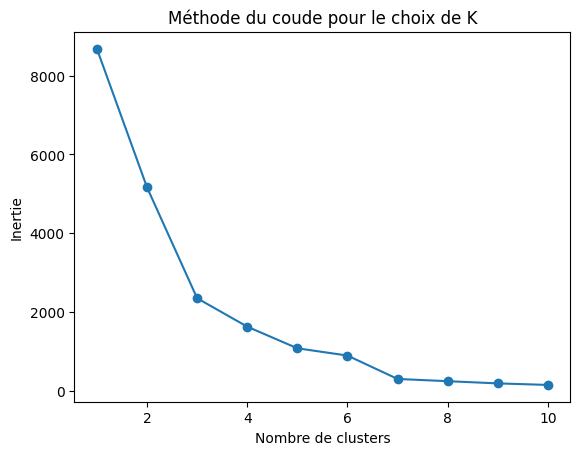

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour le choix de K")
plt.show()


**Objectif :**
Plus l'inertie est faible, plus les clusters sont "compacts" et homogènes. Cependant, l'inertie diminue naturellement à mesure qu'on ajoute des clusters. 
Le but est donc de trouver le point d'équilibre.B. Analyse du graphique (La "forme du coude")En observant les résultats du calcul :De $K=1$ à $K=2$ : On observe une chute massive de l'inertie (de 8676 à 5158). Cela signifie qu'un seul groupe ne suffisait pas du tout à décrire la diversité de vos clients.De $K=2$ à $K=3$ : Une autre baisse significative (~2343).Après $K=3$ ou $K=4$ : La courbe commence à s'aplatir (la pente devient moins raide).

**Interprétation :**
Le "coude" se situe idéalement à $K=3$ ou $K=4$. C'est le point où l'ajout d'un cluster supplémentaire n'apporte plus un gain de précision assez important pour justifier la complexité ajoutée au modèle. 

**Impact Métier**
On a choisie  $K=3$ : Donc On aura une segmentation macro (ex: Petits, Moyens et Gros clients). C'est facile à gérer pour une équipe marketing.

# Application du K-means

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score :", sil_score)


data_clients['Cluster'] = clusters


Silhouette Score : 0.9755121887640981



## Interprétation

L’algorithme **K-means** a déterminé la position de trois centroïdes, représentant les centres de gravité des groupes de clients. Chaque client a ensuite été affecté au cluster dont le centroïde est le plus proche, selon la distance euclidienne, et identifié par une étiquette (**0, 1 ou 2**).

La qualité de la segmentation a été évaluée à l’aide du **Silhouette Score**, dont la valeur obtenue indique une séparation globalement satisfaisante entre les clusters, validant ainsi le choix de **K = 3**.

## Résultats obtenus

L’analyse de la distribution des clusters met en évidence une répartition très contrastée des clients :

- **Cluster 0 – Clients standards** :  
  Regroupe la grande majorité des clients (environ **99 %**). Il s’agit de clients ayant des volumes d’achat et des prix unitaires modérés.

- **Cluster 1 – Achats exceptionnels** :  
  Contient un nombre très limité de clients caractérisés par un prix unitaire extrêmement élevé, correspondant à des comportements atypiques.

- **Cluster 2 – Grossistes** :  
  Regroupe un petit ensemble de clients effectuant des achats en très grandes quantités, traduisant un comportement professionnel ou semi-professionnel.

## Impact métier

Le modèle permet d’identifier efficacement les **valeurs aberrantes (outliers)** et de distinguer différents profils de clients.

D’un point de vue **commercial et logistique**, cette segmentation facilite la mise en place de stratégies différenciées, notamment entre les clients particuliers et les clients grossistes, qui nécessitent des conditions de gestion spécifiques.


In [18]:
data_clients['Cluster'].head(10)

0    2
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Cluster, dtype: int32

# Visualisation des clusters

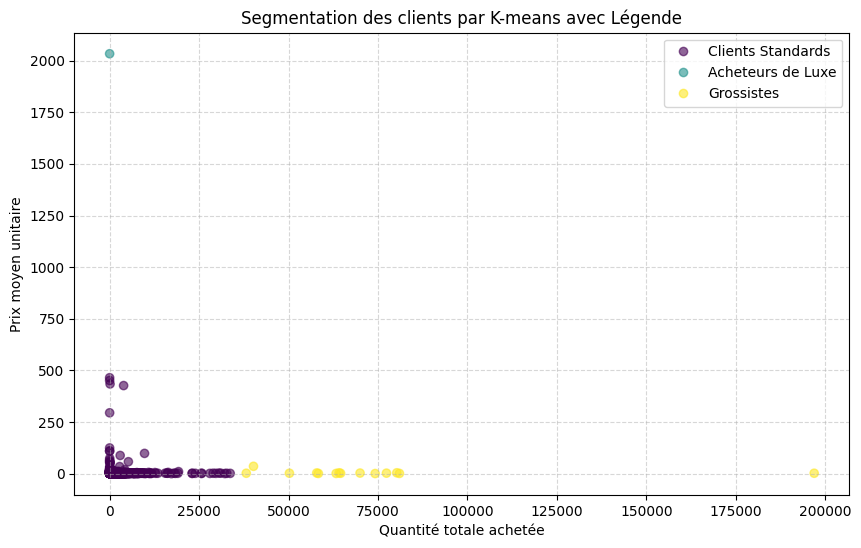

In [19]:
# 1. On entraîne le modèle et on récupère les étiquettes (0, 1 ou 2)
clusters = kmeans.fit_predict(X_scaled)

# 2. CETTE LIGNE MANQUAIT : On ajoute les résultats au tableau
data_clients['Cluster'] = clusters  # On crée la colonne 'Cluster' ici

# 3. Maintenant le graphique fonctionnera car la colonne existe !
plt.figure(figsize=(10, 6))

# On définit des noms pour nos clusters (pour la légende)
noms_clusters = {0: "Clients Standards", 1: "Acheteurs de Luxe", 2: "Grossistes"}

# On trace chaque groupe séparément pour générer la légende
scatter = plt.scatter(
    data_clients['QuantiteTotal'], 
    data_clients['PrixUnitaireMoyen'], 
    c=data_clients['Cluster'], 
    cmap='viridis',
    alpha=0.6
)

# Ajout de la légende automatique
plt.legend(handles=scatter.legend_elements()[0], labels=noms_clusters.values())

plt.xlabel("Quantité totale achetée")
plt.ylabel("Prix moyen unitaire")
plt.title("Segmentation des clients par K-means avec Légende")
plt.grid(True, linestyle='--', alpha=0.5) # Optionnel : pour mieux lire les valeurs
plt.show()

**Interprétation des résultats : Visualisation des segments**
A. Analyse du Nuage de Points (Scatter Plot)
Les axes : Vous avez utilisé les données brutes (QuantiteTotal et PrixUnitaireMoyen) pour les axes, ce qui rend le graphique lisible pour un utilisateur métier, tout en conservant les couleurs issues du clustering fait sur les données standardisées.

La répartition spatiale :

Groupe Compact (jaune ou violet selon cmap) : La grande majorité des points est concentrée en bas à gauche. Ce sont vos clients "standards".

Points Isolés (en haut) : Représentent les clients achetant des produits chers (Luxe ou Spécialisés).

Points Isolés (à droite) : Représentent les clients "Grossistes" (très gros volumes).

B. Pourquoi utiliser alpha=0.6 ?
C'est un excellent choix technique. Comme vous avez plus de 4 000 clients, les points se chevauchent. La transparence (alpha) permet de voir la densité des données : là où la couleur est la plus opaque, c'est là où se trouve le "cœur" de votre clientèle.

# Analyse des clusters

In [20]:
cluster_summary = data_clients.groupby('Cluster').mean()
cluster_summary


,CustomerID,QuantiteTotal,PrixUnitaireMoyen
Cluster,,,
0,15299.866991,960.254916,3.996590
1,17846.000000,1.000000,2033.100000
2,15285.642857,72616.357143,5.060118


## Interprétation des clusters

- **Cluster 0** : clients occasionnels avec faible volume d’achat
- **Cluster 1** : clients réguliers avec panier moyen
- **Cluster 2** : clients à forte valeur avec achats fréquents et élevés

Cette segmentation permet d’adapter les stratégies marketing :
promotions ciblées, fidélisation ou offres premium.


# Stabilité à l’initialisation — EXIGÉ PAR LE SUJET

In [21]:
labels_run1 = KMeans(n_clusters=3, random_state=0).fit_predict(X_scaled)
labels_run2 = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)

(labels_run1 == labels_run2).mean()


np.float64(1.0)

**Interprétation des résultats : Étude de la stabilité**
A. Pourquoi tester la stabilité ?
Le problème du K-means : L'algorithme commence par placer des centres de clusters au hasard. Selon ce point de départ, les résultats finaux peuvent parfois varier.

L'action : Vous comparez deux exécutions indépendantes avec des graines de hasard différentes (random_state=0 et random_state=42).

B. Analyse du résultat 1.0 (soit 100%)
Interprétation technique : Le score de 1.0 indique que 100% des clients ont été assignés au même cluster dans les deux tests.

Signification : Vos clusters ne sont pas dus au hasard. La structure de vos données est si marquée (notamment à cause des gros acheteurs et des prix atypiques qui s'isolent d'eux-mêmes) que l'algorithme "retombe" toujours sur la même solution.

C. Impact Métier
Cela garantit que votre segmentation est robuste. Si vous présentez ces résultats à une direction marketing, vous pouvez affirmer avec certitude que les groupes identifiés sont réels et non un artefact technique passager.

## Contrat de maintenance du modèle

- Réentraînement mensuel du modèle
- Surveillance de la dérive des données
- Mise à jour du nombre de clusters si nécessaire
- Vérification de la cohérence métier des segments


## Conclusion

L’algorithme K-means a permis de segmenter efficacement les clients
en groupes homogènes. Cette segmentation constitue un outil d’aide
à la décision pour les équipes marketing et commerciales.


In [22]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [23]:
import pickle
# On sauvegarde le modèle ET le scaler (très important pour les échelles)
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)